In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings

(-2.7292712056271964,
 2.5702744393352615,
 -0.93261815751787513,
 1.004413830229183)

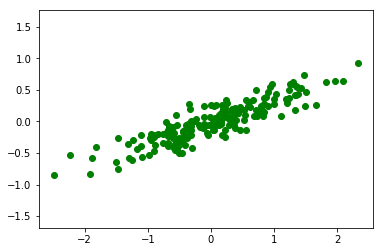

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'og')
plt.axis('equal')

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print('pca.explained_variance_')
print(pca.explained_variance_)
print('pca.components_')
print(pca.components_)

pca.explained_variance_
[ 0.75871884  0.01838551]
pca.components_
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


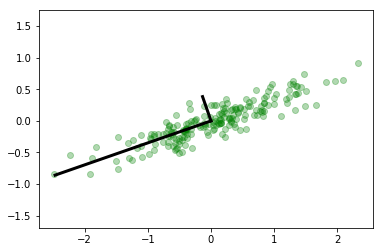

In [4]:
plt.clf()
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

In [5]:
clf = PCA(0.95)
X_trans = clf.fit_transform(X)
print('X.shape')
print(X.shape)
print('X_trans.shape')
print(X_trans.shape)

X.shape
(200, 2)
X_trans.shape
(200, 1)


(-2.7311582267664378,
 2.6099018832593321,
 -0.96727657063893158,
 1.0060642308539951)

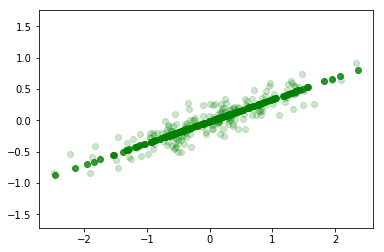

In [6]:
X_new = clf.inverse_transform(X_trans)
plt.clf()
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'og', alpha=0.8)
plt.axis('equal')

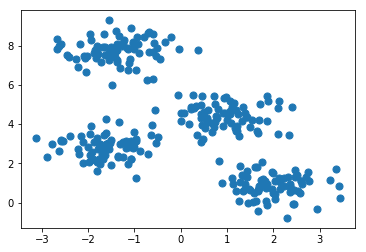

In [7]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], s=50)

In [8]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
print('y_kmeans')
print(y_kmeans)

y_kmeans
[2 1 0 1 2 2 3 0 1 1 3 1 0 1 2 0 0 2 3 3 2 2 0 3 3 0 2 0 3 0 1 1 0 1 1 1 1
 1 3 2 0 3 0 0 3 3 1 3 1 2 3 2 1 2 2 3 1 3 1 2 1 0 1 3 3 3 1 2 1 3 0 3 1 3
 3 1 3 0 2 1 2 0 2 2 1 0 2 0 1 1 0 2 1 3 3 0 2 2 0 3 1 2 1 2 0 2 2 0 1 0 3
 3 2 1 2 0 1 2 2 0 3 2 3 2 2 2 2 3 2 3 1 3 3 2 1 3 3 1 0 1 1 3 0 3 0 3 1 0
 1 1 1 0 1 0 2 3 1 3 2 0 1 0 0 2 0 3 3 0 2 0 0 1 2 0 3 1 2 2 0 3 2 0 3 3 0
 0 0 0 2 1 0 3 0 0 3 3 3 0 3 1 0 3 2 3 0 1 3 1 0 1 0 3 0 0 1 3 3 2 2 0 1 2
 2 3 2 3 0 1 1 0 0 1 0 2 3 0 2 3 1 3 2 0 2 1 1 1 1 3 3 1 0 3 2 0 3 3 3 2 2
 1 0 0 3 2 1 3 0 1 0 2 2 3 3 0 2 2 2 0 1 1 2 2 0 2 2 2 1 3 1 0 2 2 1 1 1 2
 2 0 1 3]


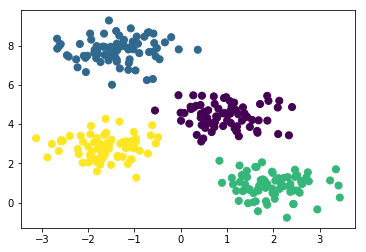

In [9]:
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50)